# Recurrent Neural Network RNN
Able to mine time series information and semantic information in data  
特征的上下文：序列 ，考虑时间点之间的权重矩阵W与上一时刻隐藏层值  
回顾：MLP常用于分类问题，RNN常用于图像分类问题，RNN常用于视频语音处理或NLP领域。

因为梯度弥散，RNN只具备短期记忆，对较早的序列不具备记忆功能。  
LSTM通过引入门机制和细胞状态，可以处理长序列数据，现在一般使用LSTM。  
门控装置可以挑选储存的信息

In [30]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
#import training data set
training_set = pd.read_csv('./Google_Stock_Price/Google_Stock_Price_Train.csv')
# summarize the data
print(training_set[:5])
print('training_set, Datatype : %s , Shape : %s ' % (type(training_set), training_set.shape))
# wrong:print('Datatype: training_set: %s' % (training_set.dtype))
# training_set is an structure of pd.DataFrame, it has no attribute 'dtype'
training_set=training_set.iloc[:,1:2]
# DataFrame.iloc: selection by integer-location.
# we need a matrix instead of vector for future calculations so[:,1:2] and not [:,1]
print('--------After Reshape-----')
print(training_set[:5])
print('training_set, Datatype : %s , Shape : %s' % (type(training_set), training_set.shape))

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
training_set, Datatype : <class 'pandas.core.frame.DataFrame'> , Shape : (1258, 6) 
--------After Reshape-----
     Open
0  325.25
1  331.27
2  329.83
3  328.34
4  322.04
training_set, Datatype : <class 'pandas.core.frame.DataFrame'> , Shape : (1258, 1)


In [32]:
# Data Preprocessing

# feature scaling (standardization or normalization)
# normalization's result is better
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
training_set = scale.fit_transform(training_set)

#  extract input and output from the training_set
X_train=training_set[:-1,:]
Y_train=training_set[1:,:]
print('X_train, Datatype : %s , Shape : %s' % (type(X_train), X_train.shape))
print('Y_train, Datatype : %s , Shape : %s' % (type(Y_train), Y_train.shape))

X_train, Datatype : <class 'numpy.ndarray'> , Shape : (1257, 1)
Y_train, Datatype : <class 'numpy.ndarray'> , Shape : (1257, 1)


In [33]:
#reshape to make in format for keras function!
X_train = np.reshape(X_train,(1257,1,1))
print('X_train, Datatype : %s , Shape : %s' % (type(X_train), X_train.shape))

X_train, Datatype : <class 'numpy.ndarray'> , Shape : (1257, 1, 1)


In [35]:
#Building RNN

#importing packages and libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [36]:
#initialise RNN
regressor=Sequential()

#add input layer and LSTM layer
#by parameter tuning found that 4 memory units and sigmoid activation is better
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

#add output layer
regressor.add(Dense(units=1))   #output dimension is 1

In [37]:
# Display the architecture of your model
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile and fitting the RNN
#parameters got by tuning are as below

In [44]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
history = regressor.fit(x=X_train,y=Y_train,batch_size=32,epochs=200)
# the default value of epoch is 200
# loss: 2.6979e-04

Epoch 1/200
40/40 [==============================] - 0s 1ms/step - loss: 2.7723e-04
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6774e-04
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6902e-04
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6940e-04
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6587e-04
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6645e-04
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6755e-04
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6894e-04
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6963e-04
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 2.7063e-04
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 2.7198e-04
Epoch 12/200
40/40 [==============================] - 0s 972us/step - loss

In [39]:
#prediction and visulaizing the result
test_set=pd.read_csv('./Google_Stock_Price/Google_Stock_Price_Test.csv')
real_stock_price=test_set.iloc[:,1:2]   
#we need a matrix instead of vector for future calculations so[:,1:2] and not [:,1]

# wrong:print('Datatype: training_set: %s' % (training_set.dtype))

     Open
0  778.81
1  788.36
2  786.08
3  795.26
4  806.40
real_stock_price, Datatype : <class 'pandas.core.frame.DataFrame'> , Shape : (20, 1) 


In [40]:
#prediction
inputs = scale.transform(real_stock_price)
inputs = np.reshape(inputs,(20,1,1))

In [41]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = scale.inverse_transform(predicted_stock_price)

In [43]:
print(real_stock_price[:5])
print('real_stock_price, Datatype : %s , Shape : %s ' % (type(real_stock_price), real_stock_price.shape))
print(predicted_stock_price [:5])
print('predicted_stock_price , Datatype : %s , Shape : %s ' % (type(predicted_stock_price ), predicted_stock_price .shape))

     Open
0  778.81
1  788.36
2  786.08
3  795.26
4  806.40
real_stock_price, Datatype : <class 'pandas.core.frame.DataFrame'> , Shape : (20, 1) 
[[775.3648 ]
 [783.6804 ]
 [781.70496]
 [789.62054]
 [799.08905]]
predicted_stock_price , Datatype : <class 'numpy.ndarray'> , Shape : (20, 1) 


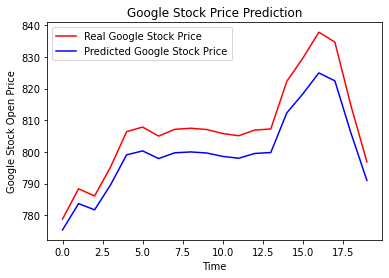

In [42]:
#visualising the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Open Price')
plt.legend()
plt.show()

# Evaluate the model

In [46]:
loss, acc = regressor.evaluate(inputs, real_stock_price, verbose=0)
print('the accuracy of test set is: %.3f ' % (acc * 100.0))

TypeError: cannot unpack non-iterable float object

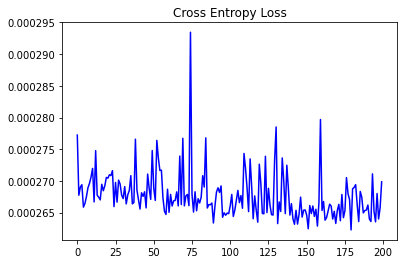

In [49]:
from matplotlib import pyplot
pyplot.subplot()
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
# pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
